## Copying model.h5 file

In [1]:
# model.h5 file is also uploaded to github repo so can be downloaded from there directly
!wget = https://raw.githubusercontent.com/rani700/xray/master/model.h5

--2021-05-12 18:58:16--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2021-05-12 18:58:16--  https://raw.githubusercontent.com/rani700/xray/master/model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93276536 (89M) [application/octet-stream]
Saving to: ‘model.h5’

model.h5            100%[===================>]  88.96M   124MB/s    in 0.7s    

2021-05-12 18:58:20 (124 MB/s) - ‘model.h5’ saved [93276536/93276536]

FINISHED --2021-05-12 18:58:20--
Total wall clock time: 3.7s
Downloaded: 1 files, 89M in 0.7s (124 MB/s)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving COVID Lung X-Ray.png to COVID Lung X-Ray.png
User uploaded file "COVID Lung X-Ray.png" with length 691657 bytes


In [5]:
from keras.models import load_model
from keras import backend as keras
model = load_model('model.h5', custom_objects={'dice_coef_loss':                   
dice_coef_loss, 'dice_coef': dice_coef})

In [6]:
img_path = list(uploaded.keys())[0]

In [7]:
X_shape = 512

In [8]:
x_im = cv2.resize(cv2.imread(img_path),(X_shape,X_shape))[:,:,0]

In [9]:
op = model.predict((x_im.reshape(1, 512, 512, 1)-127.0)/127.0)

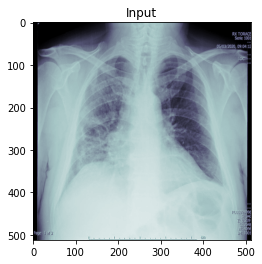

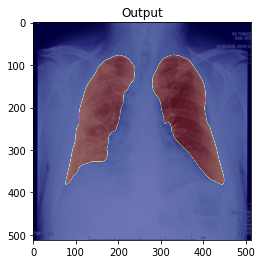

In [10]:
plt.imshow(x_im, cmap="bone", label="Input Image")
plt.title("Input")
plt.show()

plt.imshow(x_im, cmap="bone", label="Output Image")
plt.imshow(op.reshape(512, 512), alpha=0.5, cmap="jet")
plt.title("Output")
plt.show()